<a href="https://colab.research.google.com/github/EndhyP/Tugas_Akhir/blob/main/Latihan/Data_Boiler/Data_Boiler_Endhy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
root_path = 'gdrive/My Drive/Tugas Akhir Endhy Priambodo/Data Boiler'

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Tugas Akhir Endhy Priambodo/Data Boiler/Data_BoilerEndhy.csv')
df

,ID GroundTruth,Status Normal,KodeStatus,KodePeriodeRusak,TimeStamp,Boiler_Steam_Drum_Pressure,PSH_Inlet_Steam_Side_B_Temperature,Soot_Blower_Steam_Side_A_Pressure,Secondary_Air_Heater_A.Outlet_Air_Temperature,Boiler.Total_Air_Flow,...,Boiler.Furnace_Pressure,SSH_Inlet_Steam_Side_B_Temperature,PAH_B_Outlet_Pressure,PAH_A_Differential_Pressure,Auxiliary_Steam_Water_Spray_Flow,PAH_A_Outlet_Pressure,Primary_Air_Heater_B.Outlet_Flue_Gas_Temperature,BFPT_A.Feedwater_Outlet_Temperature,Auxiliary_Steam_Header_Pressure,SSH_Inlet_Steam_Side_A_Temperature
0,-8,Normal,Normal,Normal,7-Oct 19,180.290512,400.797729,29.519844,236.423703,2000.753660,...,-20.771143,398.206238,1054.630370,9.473428,0.857719,1076.407590,118.818146,186.445500,10.381501,398.530182
1,-8,Normal,Normal,Normal,7-Oct 19,180.010483,400.099854,29.666600,236.423703,2017.940000,...,-14.487835,398.829468,1057.653440,9.473428,0.857729,1080.928830,118.668594,186.445267,10.374821,399.032700
2,-8,Normal,Normal,Normal,7-Oct 19,179.930344,399.780365,30.363430,236.423703,2001.479250,...,-21.507025,398.640100,1054.342410,9.473428,0.852943,1081.720000,118.485900,186.383926,10.384729,398.907500
3,-8,Normal,Normal,Normal,7-Oct 19,179.850200,399.762817,29.290243,236.423703,2003.363770,...,-22.624966,397.211823,1063.402590,9.473428,0.857746,1084.522340,118.439339,186.318665,10.387254,397.519257
4,-8,Normal,Normal,Normal,7-Oct 19,179.548400,399.351959,29.397963,236.423703,2016.664000,...,-17.234722,398.369232,1043.002080,9.473428,0.853259,1066.850100,118.281624,186.314285,10.391485,398.961060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,-8,Normal,Normal,Normal,21-Nov 19,147.204212,366.266617,25.782195,236.423703,1785.877203,...,-12.640904,357.519580,924.850687,9.473428,1.167581,938.098176,113.164737,165.834455,10.205712,357.365627
65531,-8,Normal,Normal,Normal,21-Nov 19,147.204212,366.266617,25.782195,236.423703,1785.877203,...,-12.640904,357.519580,924.850687,9.473428,1.167581,938.098176,113.164737,165.834455,10.205712,357.365627
65532,-8,Normal,Normal,Normal,21-Nov 19,147.204212,366.266617,25.782195,236.423703,1785.877203,...,-12.640904,357.519580,924.850687,9.473428,1.167581,938.098176,113.164737,165.834455,10.205712,357.365627
65533,-8,Normal,Normal,Normal,21-Nov 19,147.204212,366.266617,25.782195,236.423703,1785.877203,...,-12.640904,357.519580,924.850687,9.473428,1.167581,938.098176,113.164737,165.834455,10.205712,357.365627


In [ ]:
df.isnull().sum()

ID GroundTruth                                        0
Status Normal                                         0
KodeStatus                                            0
KodePeriodeRusak                                      0
TimeStamp                                             0
Boiler_Steam_Drum_Pressure                            0
PSH_Inlet_Steam_Side_B_Temperature                    0
Soot_Blower_Steam_Side_A_Pressure                     0
Secondary_Air_Heater_A.Outlet_Air_Temperature         0
Boiler.Total_Air_Flow                                 0
Economizer_Outlet_Flue_Gas_Temperature                0
Secondary_Air_Duct_Pressure                           0
Secondary_Air_Heater_B.Inlet_Air_Temperature          0
Economizer_Outlet_Feedwater_Side_B_Temperature        0
Primary_Air_Heater_B.Outlet_Air_Temperature           0
Booster_BFPT_A.Outlet_Pressure                        0
SAH_B_Outlet_Pressure                                 0
Boiler.O2_in_Flue_Gas_B                         

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 54 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   ID GroundTruth                                      65535 non-null  int64  
 1   Status Normal                                       65535 non-null  object 
 2   KodeStatus                                          65535 non-null  object 
 3   KodePeriodeRusak                                    65535 non-null  object 
 4   TimeStamp                                           65535 non-null  object 
 5   Boiler_Steam_Drum_Pressure                          65535 non-null  float64
 6   PSH_Inlet_Steam_Side_B_Temperature                  65535 non-null  float64
 7   Soot_Blower_Steam_Side_A_Pressure                   65535 non-null  float64
 8   Secondary_Air_Heater_A.Outlet_Air_Temperature       65535 non-null  float64


In [ ]:
df.duplicated().sum()

185

# Practical Statistics for Data Scientists (Python)
# Chapter 1. Exploratory Data Analysis


In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
!pip install wquantiles
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df

,ID GroundTruth,Status Normal,KodeStatus,KodePeriodeRusak,TimeStamp,Boiler_Steam_Drum_Pressure,PSH_Inlet_Steam_Side_B_Temperature,Soot_Blower_Steam_Side_A_Pressure,Secondary_Air_Heater_A.Outlet_Air_Temperature,Boiler.Total_Air_Flow,...,Boiler.Furnace_Pressure,SSH_Inlet_Steam_Side_B_Temperature,PAH_B_Outlet_Pressure,PAH_A_Differential_Pressure,Auxiliary_Steam_Water_Spray_Flow,PAH_A_Outlet_Pressure,Primary_Air_Heater_B.Outlet_Flue_Gas_Temperature,BFPT_A.Feedwater_Outlet_Temperature,Auxiliary_Steam_Header_Pressure,SSH_Inlet_Steam_Side_A_Temperature
0,-8,Normal,Normal,Normal,7-Oct 19,180.290512,400.797729,29.519844,236.423703,2000.753660,...,-20.771143,398.206238,1054.630370,9.473428,0.857719,1076.407590,118.818146,186.445500,10.381501,398.530182
1,-8,Normal,Normal,Normal,7-Oct 19,180.010483,400.099854,29.666600,236.423703,2017.940000,...,-14.487835,398.829468,1057.653440,9.473428,0.857729,1080.928830,118.668594,186.445267,10.374821,399.032700
2,-8,Normal,Normal,Normal,7-Oct 19,179.930344,399.780365,30.363430,236.423703,2001.479250,...,-21.507025,398.640100,1054.342410,9.473428,0.852943,1081.720000,118.485900,186.383926,10.384729,398.907500
3,-8,Normal,Normal,Normal,7-Oct 19,179.850200,399.762817,29.290243,236.423703,2003.363770,...,-22.624966,397.211823,1063.402590,9.473428,0.857746,1084.522340,118.439339,186.318665,10.387254,397.519257
4,-8,Normal,Normal,Normal,7-Oct 19,179.548400,399.351959,29.397963,236.423703,2016.664000,...,-17.234722,398.369232,1043.002080,9.473428,0.853259,1066.850100,118.281624,186.314285,10.391485,398.961060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,-8,Normal,Normal,Normal,21-Nov 19,147.204212,366.266617,25.782195,236.423703,1785.877203,...,-12.640904,357.519580,924.850687,9.473428,1.167581,938.098176,113.164737,165.834455,10.205712,357.365627
65531,-8,Normal,Normal,Normal,21-Nov 19,147.204212,366.266617,25.782195,236.423703,1785.877203,...,-12.640904,357.519580,924.850687,9.473428,1.167581,938.098176,113.164737,165.834455,10.205712,357.365627
65532,-8,Normal,Normal,Normal,21-Nov 19,147.204212,366.266617,25.782195,236.423703,1785.877203,...,-12.640904,357.519580,924.850687,9.473428,1.167581,938.098176,113.164737,165.834455,10.205712,357.365627
65533,-8,Normal,Normal,Normal,21-Nov 19,147.204212,366.266617,25.782195,236.423703,1785.877203,...,-12.640904,357.519580,924.850687,9.473428,1.167581,938.098176,113.164737,165.834455,10.205712,357.365627


In [ ]:
df.KodeStatus.value_counts()

Normal    43003
FD1       22532
Name: KodeStatus, dtype: int64

In [ ]:
df.Boiler_Steam_Drum_Pressure.value_counts()

147.204212    122
183.822327     73
183.557129     10
181.996155     10
181.885376     10
             ... 
182.650558      1
182.875200      1
181.050600      1
183.089874      1
180.290512      1
Name: Boiler_Steam_Drum_Pressure, Length: 56708, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


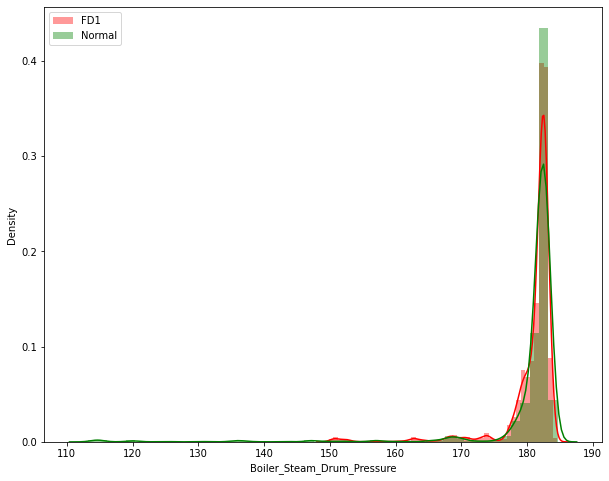

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df.Boiler_Steam_Drum_Pressure[df.KodeStatus == 'FD1'], color='r', label='FD1') 
sns.distplot(df.Boiler_Steam_Drum_Pressure[df.KodeStatus == 'Normal'], color='g', label='Normal') 
plt.legend();